<h2>reading segment table

In [1]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from pyspark_dist_explore import hist
from pyspark.sql.types import *
import seaborn as sns
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib
import datetime
import pickle
import os

In [2]:
#schema of segment table
schema_segments ='deviceId String,\
                  type Integer,\
                  dateTime string,\
                  startLatitude double,\
                  startLongitude double,\
                  startEngineStatus Integer,\
                  startAccuracyDrop Integer,\
                  endAccuracyDrop Integer,\
                  endEngineStatus Integer,\
                  endLatitude double,\
                  endLongitude double,\
                  segmentDistance double,\
                  segmentDuration double,\
                  segmentSpeedKmH double'
#reading csv
path = os.path.abspath(os.getcwd())
df_segments= spark.read.csv('file:///%s/segment_table_no_filter'%path,sep=",", schema = schema_segments)

In [3]:
df_segments.count()

333341694

<h1> Duration histogram and CDF

In [5]:
df_duration = df_segments.select('segmentDuration')

In [7]:
df_duration.show()

+---------------+
|segmentDuration|
+---------------+
|           17.0|
|           21.0|
|           29.0|
|           18.0|
|            1.0|
|           31.0|
|            2.0|
|           17.0|
|           17.0|
|           18.0|
|           21.0|
|           17.0|
|           20.0|
|           25.0|
|           37.0|
|           36.0|
|           31.0|
|           12.0|
|          107.0|
|          223.0|
+---------------+
only showing top 20 rows



In [91]:
df_duration_percentile = df_duration.agg(F.expr('percentile(segmentDuration, array(0.0))')[0].alias("0.0"),
                                         F.expr('percentile(segmentDuration, array(0.06))')[0].alias("0.05"),
                                         F.expr('percentile(segmentDuration, array(0.10))')[0].alias("0.10"),
                                         F.expr('percentile(segmentDuration, array(0.15))')[0].alias("0.15"),
                                         F.expr('percentile(segmentDuration, array(0.20))')[0].alias("0.20"),
                                         F.expr('percentile(segmentDuration, array(0.25))')[0].alias("0.25"),
                                         F.expr('percentile(segmentDuration, array(0.30))')[0].alias("0.30"),
                                         F.expr('percentile(segmentDuration, array(0.35))')[0].alias("0.35"),
                                         F.expr('percentile(segmentDuration, array(0.40))')[0].alias("0.40"),
                                         F.expr('percentile(segmentDuration, array(0.45))')[0].alias("0.45"),
                                         F.expr('percentile(segmentDuration, array(0.50))')[0].alias("0.50"),
                                         F.expr('percentile(segmentDuration, array(0.55))')[0].alias("0.55"),
                                         F.expr('percentile(segmentDuration, array(0.60))')[0].alias("0.60"),
                                         F.expr('percentile(segmentDuration, array(0.65))')[0].alias("0.65"),
                                         F.expr('percentile(segmentDuration, array(0.70))')[0].alias("0.70"),
                                         F.expr('percentile(segmentDuration, array(0.75))')[0].alias("0.75"),
                                         F.expr('percentile(segmentDuration, array(0.80))')[0].alias("0.80"),
                                         F.expr('percentile(segmentDuration, array(0.85))')[0].alias("0.85"),
                                         F.expr('percentile(segmentDuration, array(0.90))')[0].alias("0.90"),
                                         F.expr('percentile(segmentDuration, array(0.91))')[0].alias("0.91"),  
                                         F.expr('percentile(segmentDuration, array(0.92))')[0].alias("0.92"),
                                         F.expr('percentile(segmentDuration, array(0.93))')[0].alias("0.93"),
                                         F.expr('percentile(segmentDuration, array(0.94))')[0].alias("0.94"),
                                         F.expr('percentile(segmentDuration, array(0.95))')[0].alias("0.95"),
                                         F.expr('percentile(segmentDuration, array(0.96))')[0].alias("0.96"),
                                         F.expr('percentile(segmentDuration, array(0.97))')[0].alias("0.97"),
                                         F.expr('percentile(segmentDuration, array(0.98))')[0].alias("0.98"),
                                         F.expr('percentile(segmentDuration, array(0.99))')[0].alias("0.99"),
                                         F.expr('percentile(segmentDuration, array(1.0))')[0].alias("1.0"))

In [92]:
df_duration_percentile.show()

+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+------+------+------+-------+-----------+
|0.0|0.05|0.10|0.15|0.20|0.25|0.30|0.35|0.40|0.45|0.50|0.55|0.60|0.65|0.70|0.75|0.80|0.85|0.90|0.91|0.92| 0.93| 0.94| 0.95|  0.96|  0.97|  0.98|   0.99|        1.0|
+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+------+------+------+-------+-----------+
|0.0| 7.0|13.0|21.0|31.0|42.0|55.0|60.0|60.0|60.0|60.0|60.0|60.0|60.0|60.0|60.0|60.0|60.0|61.0|61.0|90.0|141.0|190.0|414.0|1033.0|2697.0|8165.0|34340.0|3.1182013E7|
+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+------+------+------+-------+-----------+



In [93]:
duration_quantile = df_duration_percentile.toPandas()

In [94]:
dic = {}
for column in duration_quantile:
    dic[column] = duration_quantile[column][0]

In [16]:
dic

{'0.0': 0.0,
 '0.05': 7.0,
 '0.10': 13.0,
 '0.15': 21.0,
 '0.20': 31.0,
 '0.25': 42.0,
 '0.30': 55.0,
 '0.35': 60.0,
 '0.40': 60.0,
 '0.45': 60.0,
 '0.50': 60.0,
 '0.55': 60.0,
 '0.60': 60.0,
 '0.65': 60.0,
 '0.70': 60.0,
 '0.75': 60.0,
 '0.80': 60.0,
 '0.85': 60.0,
 '0.90': 61.0,
 '0.95': 414.0,
 '1.0': 31182013.0}

In [95]:
x_axis = list(dic.values())
y_axis = list(dic.keys())
y_axis = [round(float(i)*100,1) for i in y_axis]

In [17]:
y_axis 

[0.0,
 5.0,
 10.0,
 15.0,
 20.0,
 25.0,
 30.0,
 35.0,
 40.0,
 45.0,
 50.0,
 55.0,
 60.0,
 65.0,
 70.0,
 75.0,
 80.0,
 85.0,
 90.0,
 95.0,
 100.0]

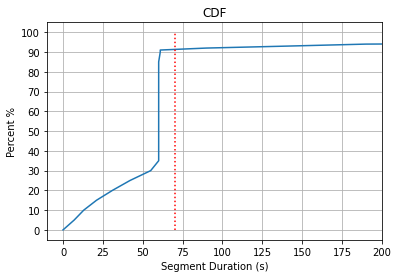

In [98]:
plt.plot(x_axis, y_axis)
plt.xlim(-10,200)
plt.yticks(np.arange(0,110,10))
plt.title('CDF')
plt.xlabel('Segment Duration (s)')
plt.ylabel('Percent %')
# plt.ylim(0,1)
plt.grid(True)
plt.vlines(x=70,ymin = 0, ymax = max(y_axis),colors='red', ls=':')
title='SegmentDuration'
plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()

In [6]:
under_70 = df_duration.filter(df_duration['segmentDuration'] <= 70).count()
under_70_ratio = under_70/df_duration.count()
under_70_ratio 

0.9149778095265815

In [7]:
df_duration.filter(df_duration['segmentDuration'] == 60).count()/df_duration.count()

0.5622945655277074

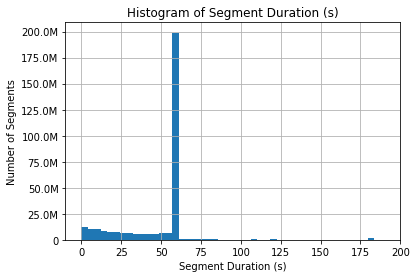

In [100]:
'''### DURATION HISTOGRAM ###'''
plt.xlim(-10,200)
hist(plt.gca(), [df_duration.select('segmentDuration')], bins=list(np.linspace(0, 200)))
plt.title('Histogram of Segment Duration (s)')
title='Segment Duration (s)'
plt.xlabel(title)
plt.ylabel('Number of Segments')
plt.grid(True)
title='SegmentDuration'
plt.savefig(f'{title}_histogram.jpg',bbox_inches='tight')

<h1> Segment Speed histogram and CDF

In [4]:
df_speed = df_segments.select('SegmentSpeedKmH')

In [5]:
df_speed = df_speed.select('SegmentSpeedKmH', F.round(F.col('SegmentSpeedKmH'),2).alias('SegmentSpeedKmH_rounded'))

In [6]:
df_speed.show()

+------------------+-----------------------+
|   SegmentSpeedKmH|SegmentSpeedKmH_rounded|
+------------------+-----------------------+
| 118.5241810554599|                 118.52|
| 87.96355579569558|                  87.96|
| 63.50430191143995|                   63.5|
|106.48236804327686|                 106.48|
|106.96962706806568|                 106.97|
|109.36229083200946|                 109.36|
|111.53136847898955|                 111.53|
|110.30616283150182|                 110.31|
|107.25546371353025|                 107.26|
|101.44841135914244|                 101.45|
| 95.62997913017496|                  95.63|
|104.05019744497824|                 104.05|
| 93.98091572777204|                  93.98|
|   73.279879901436|                  73.28|
|14.432969287238947|                  14.43|
| 53.71259030393771|                  53.71|
|53.349292507299054|                  53.35|
|35.858005431357476|                  35.86|
| 78.75303208927397|                  78.75|
|  79.9553

In [77]:
df_speed_percentile = df_speed.agg(F.expr('percentile(SegmentSpeedKmH_rounded, array(0.0))')[0].alias("0.0"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.06))')[0].alias("0.05"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.10))')[0].alias("0.10"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.15))')[0].alias("0.15"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.20))')[0].alias("0.20"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.25))')[0].alias("0.25"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.30))')[0].alias("0.30"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.35))')[0].alias("0.35"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.40))')[0].alias("0.40"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.45))')[0].alias("0.45"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.50))')[0].alias("0.50"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.55))')[0].alias("0.55"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.60))')[0].alias("0.60"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.65))')[0].alias("0.65"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.70))')[0].alias("0.70"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.75))')[0].alias("0.75"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.80))')[0].alias("0.80"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.85))')[0].alias("0.85"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.90))')[0].alias("0.90"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.91))')[0].alias("0.91"),  
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.92))')[0].alias("0.92"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.93))')[0].alias("0.93"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.94))')[0].alias("0.94"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.95))')[0].alias("0.95"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.96))')[0].alias("0.96"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.97))')[0].alias("0.97"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.98))')[0].alias("0.98"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(0.99))')[0].alias("0.99"),
                                 F.expr('percentile(SegmentSpeedKmH_rounded, array(1.0))')[0].alias("1.0"))

In [78]:
df_speed_percentile.show()

+---+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+-----+------+------+-------+
|0.0|0.05|0.10|0.15|0.20|0.25|0.30|0.35| 0.40| 0.45| 0.50| 0.55| 0.60| 0.65| 0.70| 0.75| 0.80| 0.85|0.90| 0.91| 0.92| 0.93| 0.94| 0.95| 0.96| 0.97|  0.98|  0.99|    1.0|
+---+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+-----+------+------+-------+
|0.0|0.06| 0.2|0.54|1.53| 3.6| 6.1|8.79|11.57|14.38|17.28|20.32|23.56|27.07|30.95|35.47|41.01|48.34|59.4|62.59|66.42|71.18|76.97|83.39|89.62|97.95|108.09|120.66|73883.9|
+---+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+-----+------+------+-------+



In [79]:
speed_quantile = df_speed_percentile.toPandas()

In [80]:
dic = {}
for column in speed_quantile:
    dic[column] = speed_quantile[column][0]

In [81]:
x_axis = list(dic.values())
y_axis = list(dic.keys())
y_axis = [round(float(i)*100,1) for i in y_axis]

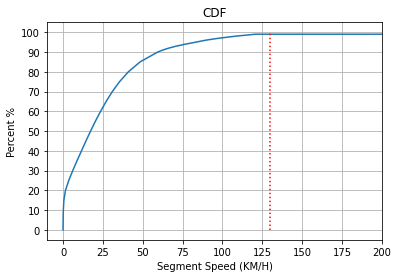

In [89]:
plt.plot(x_axis, y_axis)
plt.xlim(-10,200)
plt.yticks(np.arange(0,110,10))
plt.title('CDF')
plt.xlabel('Segment Speed (KM/H)')
plt.ylabel('Percent %')
# plt.ylim(0,1)
plt.grid(True)
plt.vlines(x=130,ymin = 0, ymax = max(y_axis),colors='red', ls=':')
title='SegmentSpeedKmH'
plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()

In [84]:
under_130 = df_speed.filter(df_speed['SegmentSpeedKmH_rounded'] <= 130).count()
under_130_ratio = under_130/df_duration.count()
under_130_ratio 

0.994860945897755

In [8]:
df_speed.filter(df_speed['SegmentSpeedKmH_rounded'] <= 130).count()/df_speed.count()

0.994860945897755

In [9]:
df_speed.filter(df_speed['SegmentSpeedKmH_rounded'] == 0.0 ).count()/df_speed.count()

0.027264246158177862

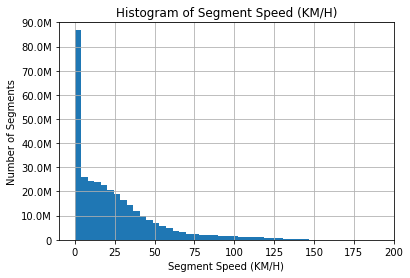

In [90]:
'''### SPEED HISTOGRAM ###'''
plt.xlim(-10,200)
hist(plt.gca(), [df_speed.select('SegmentSpeedKmH_rounded')], bins=list(np.linspace(0, 200)))
plt.title('Histogram of Segment Speed (KM/H)')
title='Segment Speed (KM/H)'
plt.xlabel(title)
plt.ylabel('Number of Segments')
plt.ylim(0,90000000,10000000)
plt.grid(True)
title='SegmentSpeedKmH'
plt.savefig(f'{title}_histogram.jpg',bbox_inches='tight')

<h1> GPS Accuracy

In [25]:
#GPS accuracy
 
schema_inital_segment = 'idRequest string, deviceId string, dateTime timestamp, \
latitude double, longitude double, speedKmh Integer, heading Integer,\
accuracyDrop double, EngineStatus Integer, Type Integer, segmentDistance double,\
segmentDuration double, segmentSpeedKmH double'
#reading csv
path = os.path.abspath(os.getcwd())
df_gps = spark.read.csv('file:///%s/all_merged_no_filter/*'%path,sep=",", schema = schema_inital_segment)

In [26]:
df_gps = df_gps.distinct()
df_gps = df_gps.na.drop("any")

In [27]:
df_gps.show()

+---------+--------+-------------------+--------+---------+--------+-------+------------+------------+----+---------------+---------------+-------------------+
|idRequest|deviceId|           dateTime|latitude|longitude|speedKmh|heading|accuracyDrop|EngineStatus|Type|segmentDistance|segmentDuration|    segmentSpeedKmH|
+---------+--------+-------------------+--------+---------+--------+-------+------------+------------+----+---------------+---------------+-------------------+
|        1| 2835402|2019-07-01 11:04:48|45.07664|  7.59477|       0|      0|         2.0|           1|   2|           43.2|          604.0| 0.2574961790891448|
|        1| 3170232|2019-07-03 10:48:48|45.11666| 7.632861|      51|    250|         9.0|           1|   1|         139.87|           44.0|  11.44411828679633|
|        1| 3170232|2019-07-03 19:13:40|45.11201| 7.642949|      32|     96|         8.0|           1|   1|         263.45|           17.0|  55.78892279704277|
|        1| 3170232|2019-07-11 18:44:23|

In [28]:
df_gps_percentile = df_gps.agg(F.expr('percentile(accuracyDrop, array(0.0))')[0].alias("0.0"),
                                 F.expr('percentile(accuracyDrop, array(0.06))')[0].alias("0.05"),
                                 F.expr('percentile(accuracyDrop, array(0.10))')[0].alias("0.10"),
                                 F.expr('percentile(accuracyDrop, array(0.15))')[0].alias("0.15"),
                                 F.expr('percentile(accuracyDrop, array(0.20))')[0].alias("0.20"),
                                 F.expr('percentile(accuracyDrop, array(0.25))')[0].alias("0.25"),
                                 F.expr('percentile(accuracyDrop, array(0.30))')[0].alias("0.30"),
                                 F.expr('percentile(accuracyDrop, array(0.35))')[0].alias("0.35"),
                                 F.expr('percentile(accuracyDrop, array(0.40))')[0].alias("0.40"),
                                 F.expr('percentile(accuracyDrop, array(0.45))')[0].alias("0.45"),
                                 F.expr('percentile(accuracyDrop, array(0.50))')[0].alias("0.50"),
                                 F.expr('percentile(accuracyDrop, array(0.55))')[0].alias("0.55"),
                                 F.expr('percentile(accuracyDrop, array(0.60))')[0].alias("0.60"),
                                 F.expr('percentile(accuracyDrop, array(0.65))')[0].alias("0.65"),
                                 F.expr('percentile(accuracyDrop, array(0.70))')[0].alias("0.70"),
                                 F.expr('percentile(accuracyDrop, array(0.75))')[0].alias("0.75"),
                                 F.expr('percentile(accuracyDrop, array(0.80))')[0].alias("0.80"),
                                 F.expr('percentile(accuracyDrop, array(0.85))')[0].alias("0.85"),
                                 F.expr('percentile(accuracyDrop, array(0.90))')[0].alias("0.90"),
                                 F.expr('percentile(accuracyDrop, array(0.91))')[0].alias("0.91"),  
                                 F.expr('percentile(accuracyDrop, array(0.92))')[0].alias("0.92"),
                                 F.expr('percentile(accuracyDrop, array(0.93))')[0].alias("0.93"),
                                 F.expr('percentile(accuracyDrop, array(0.94))')[0].alias("0.94"),
                                 F.expr('percentile(accuracyDrop, array(0.95))')[0].alias("0.95"),
                                 F.expr('percentile(accuracyDrop, array(0.96))')[0].alias("0.96"),
                                 F.expr('percentile(accuracyDrop, array(0.97))')[0].alias("0.97"),
                                 F.expr('percentile(accuracyDrop, array(0.98))')[0].alias("0.98"),
                                 F.expr('percentile(accuracyDrop, array(0.99))')[0].alias("0.99"),
                                 F.expr('percentile(accuracyDrop, array(1.0))')[0].alias("1.0"))

In [29]:
df_gps_percentile.show()

+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|0.0|0.05|0.10|0.15|0.20|0.25|0.30|0.35|0.40|0.45|0.50|0.55|0.60|0.65|0.70|0.75|0.80|0.85|0.90|0.91|0.92|0.93|0.94|0.95|0.96|0.97|0.98|0.99| 1.0|
+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|0.0| 6.0| 7.0| 8.0| 8.0| 9.0| 9.0| 9.0| 9.0|10.0|10.0|11.0|11.0|12.0|12.0|13.0|14.0|15.0|17.0|18.0|18.0|19.0|20.0|22.0|23.0|26.0|29.0|33.0|50.0|
+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+



In [30]:
gps_percentile = df_gps_percentile.toPandas()

In [31]:
dic = {}
for column in gps_percentile:
    dic[column] = gps_percentile[column][0]

In [32]:
x_axis = list(dic.values())
x_axis = [round(float(i)/10,1) for i in x_axis]
y_axis = list(dic.keys())
y_axis = [round(float(i)*100,1) for i in y_axis]

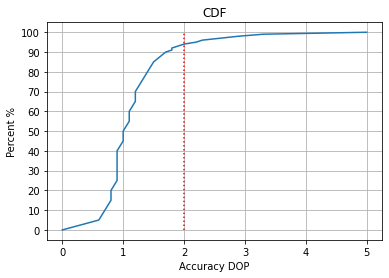

In [13]:
plt.plot(x_axis, y_axis)
# plt.xlim(-10,200)
plt.yticks(np.arange(0,110,10))
plt.title('CDF')
plt.xlabel('Accuracy DOP')
plt.ylabel('Percent %')
# plt.ylim(0,1)
plt.grid(True)
plt.vlines(x=2,ymin = 0, ymax = max(y_axis),colors='red', ls=':')
title='accuracy DOP'
# plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()

In [14]:
under_20 = df_gps.filter(df_gps['accuracyDrop'] <= 20).count()
under_20_ratio = under_20/df_gps.count()
under_20_ratio 

0.9409568856874405

In [33]:
df_gps = df_gps.withColumn('accuracyDrop', F.col('accuracyDrop')/10)

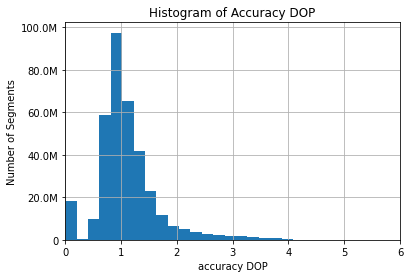

In [39]:
'''### GPS HISTOGRAM ###'''
plt.xlim(0,6)
# df_gps = df_gps.withColumn('accuracyDrop', F.col('accuracyDrop')/10)
hist(plt.gca(), [df_gps.select('accuracyDrop')], bins=list(np.linspace(0, 10)))
plt.title('Histogram of Accuracy DOP')
# title='Accuracy Drop'
plt.xlabel(title)
plt.ylabel('Number of Segments')
# plt.ylim(0,90000000,10000000)
plt.grid(True)
title='accuracy DOP'
plt.savefig(f'{title}_histogram.jpg',bbox_inches='tight')

In [35]:
df_gps.show()

+---------+--------+-------------------+--------+---------+--------+-------+------------+------------+----+---------------+---------------+-------------------+
|idRequest|deviceId|           dateTime|latitude|longitude|speedKmh|heading|accuracyDrop|EngineStatus|Type|segmentDistance|segmentDuration|    segmentSpeedKmH|
+---------+--------+-------------------+--------+---------+--------+-------+------------+------------+----+---------------+---------------+-------------------+
|        1| 2509187|2019-11-03 16:22:36|45.07973|  7.59377|     185|     96|         0.2|           1|   2|         513.67|           10.0|  184.9198483681491|
|        1| 2509187|2019-11-05 11:20:21|45.05768|  7.51737|     172|    118|         0.1|           1|   2|         144.77|            3.0|  173.7205554036505|
|        1| 2509187|2019-11-06 12:43:41|45.08833|  7.58725|     144|    276|         0.1|           1|   2|         739.49|           19.0|  140.1144851484489|
|        1| 2509187|2019-11-06 12:52:15|

<H1> CDF segment duration under 60 seconds breakdown

In [133]:
#dataframe division into intervals
duration_0_9 = df_segments.filter(df_segments['segmentDuration'] < 10)
duration_10_19 = df_segments.filter((df_segments['segmentDuration'] < 20) & (df_segments['segmentDuration'] >= 10))
duration_20_29 = df_segments.filter((df_segments['segmentDuration'] < 30) & (df_segments['segmentDuration'] >= 20))
duration_30_39 = df_segments.filter((df_segments['segmentDuration'] < 40) & (df_segments['segmentDuration'] >= 30))
duration_40_49 = df_segments.filter((df_segments['segmentDuration'] < 50) & (df_segments['segmentDuration'] >= 40))
duration_50_59 = df_segments.filter((df_segments['segmentDuration'] < 60) & (df_segments['segmentDuration'] >= 50))

In [134]:
#converting them into arrays
array_0_9 = [val.segmentSpeedKmH for val in duration_0_9.select('segmentSpeedKmH').collect()]
array_10_19 = [val.segmentSpeedKmH for val in duration_10_19.select('segmentSpeedKmH').collect()]
array_20_29 = [val.segmentSpeedKmH for val in duration_20_29.select('segmentSpeedKmH').collect()]
array_30_39 = [val.segmentSpeedKmH for val in duration_30_39.select('segmentSpeedKmH').collect()]
array_40_49 = [val.segmentSpeedKmH for val in duration_40_49.select('segmentSpeedKmH').collect()]
array_50_59 = [val.segmentSpeedKmH for val in duration_50_59.select('segmentSpeedKmH').collect()]


In [135]:
duration_arrays = [array_0_9,array_10_19,array_20_29,array_30_39,array_40_49,array_50_59]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


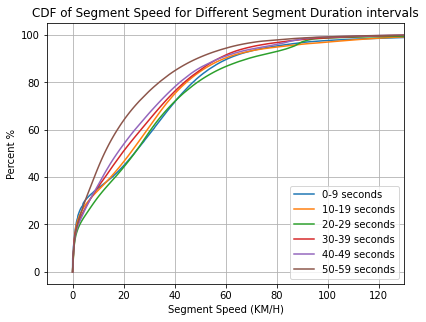

In [137]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)
label = ['0-9 seconds','10-19 seconds','20-29 seconds','30-39 seconds','40-49 seconds','50-59 seconds']
for i,array in enumerate(duration_arrays):
    plt.legend(loc='upper right',prop={'size': 12})
    x = np.sort(array)
    y = (1. * np.arange(len(x)) / (len(x) - 1))*100
    plt.plot(x, y,label = label[i])
    plt.title('CDF of Segment Speed for Different Segment Duration intervals')
#     plt.xlabel(title)
    plt.ylabel('Percent %')
    # plt.ylim(0,1)
    plt.xlim(-10,130)
    plt.xlabel('Segment Speed (KM/H)')
    plt.legend()
    plt.grid(True)
    title='SegmentSpeedKmH'
    
plt.savefig(f'under_60_CDF.jpg',bbox_inches='tight')
plt.show()